### 各種import

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

### 楽曲データを読み込む
- あらかじめ取り出しておいた楽曲データを`tracks.json`として保存しておき，データフレームとして読み込む

In [3]:
with open('tracks.json', 'r') as f:
    df = pd.read_json(f).set_index('id')

df.sample(5)

,class,index,name,persistentID,databaseID,dateAdded,time,duration,artist,albumArtist,...,albumDisliked,cloudStatus,work,movement,movementNumber,movementCount,location,purchaserName,purchaserAppleID,releaseDate
id,,,,,,,,,,,,,,,,,,,,,
32693,fileTrack,152,だから,58B59A4BE6FDF2C1,15407,2018-06-05T11:51:31.000Z,4:49,289.265991,aiko,aiko,...,False,uploaded,,,0,0,{},NaN,NaN,NaN
29378,fileTrack,2454,ラハイナ (mahalo version),C21A2C71EB4EBF8B,5644,2014-07-21T02:28:07.000Z,3:48,228.701996,DEPAPEPE,,...,False,matched,,,0,0,NaN,NaN,NaN,NaN
29006,fileTrack,1798,いい日旅立ち,E3CFFA5A60E26745,4528,2014-06-09T12:12:19.000Z,4:44,284.786011,徳永英明,,...,False,uploaded,,,0,0,{},NaN,NaN,NaN
30469,fileTrack,175,赤いランプ,5305D3FB03DCDBB2,8912,2015-06-28T07:49:22.000Z,6:18,378.600006,aiko,aiko,...,True,uploaded,,,0,0,{},NaN,NaN,NaN
31554,sharedTrack,2073,dance floor,1DE5581CFD5B1E7C,11993,2016-09-08T06:38:28.000Z,3:21,201.225998,Shiggy Jr.,,...,False,matched,,,0,0,NaN,NaN,NaN,NaN


### 楽曲ごとにランキング
- 楽曲名でグルーピングを行い再生回数を集計

In [61]:
df.groupby('name') \
    .apply(lambda df: pd.Series([df.albumArtist.iloc[0], sum(df.playedCount)], index=['artist', 'playedCount'])) \
    .sort_values('playedCount', ascending=False) \
    .head(10) \
    .reset_index()

,name,artist,playedCount
0,シアワセ,aiko,405
1,恋のスーパーボール,aiko,373
2,夢見る隙間,aiko,346
3,花火,aiko,345
4,もっと,aiko,326
5,向かいあわせ,aiko,325
6,ストロー,aiko,313
7,かばん,aiko,301
8,Loveletter,aiko,298
9,蝶々結び,aiko,292


### アーティストごとの再生回数

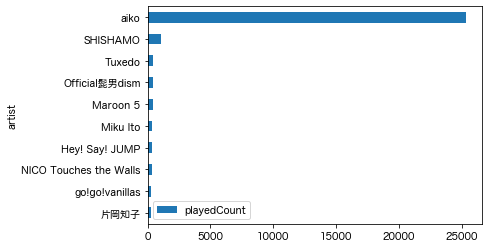

In [62]:
df.groupby('artist')['playedCount'].sum() \
    .drop('') \
    .drop('VARIOUS ARTISTS') \
    .sort_values(ascending=True) \
    .tail(10) \
    .to_frame() \
    .plot(kind='barh')

### 2019年アツかった楽曲

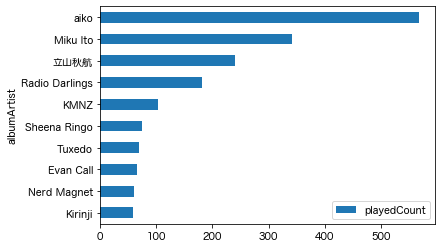

In [64]:
df[df.dateAdded > '2019'] \
    .groupby('albumArtist')['playedCount'].sum() \
    .sort_values(ascending=True) \
    .tail(10) \
    .to_frame() \
    .plot(kind='barh')

### 特定アーティストのみ抽出
- aikoのアルバム再生数で集計

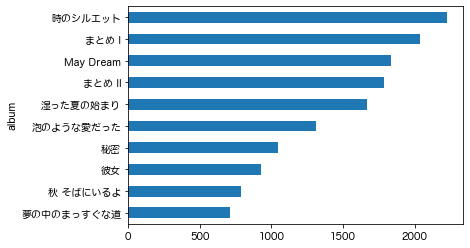

In [66]:
df[df.albumArtist == "aiko"] \
    .groupby('album')['playedCount'].sum() \
    .sort_values(ascending=True) \
    .tail(10) \
    .plot(kind='barh')